In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO12n model
model = YOLO("yolo12x.pt")

# Run inference with the YOLO12n model on the 'bus.jpg' image
results = model("/dogwith.jpg")


image 1/1 /dogwith.jpg: 448x640 1 dog, 1 sheep, 1 chair, 1 tv, 141.4ms
Speed: 7.6ms preprocess, 141.4ms inference, 363.2ms postprocess per image at shape (1, 3, 448, 640)


In [3]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

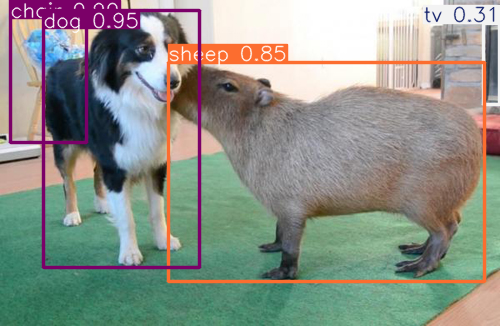

In [4]:
for item in results:
    item.show()

In [5]:
for item in results:
    print(item.boxes.xyxy.data)
    names = [item.names[cls.item()] for cls in item.boxes.cls.int()]
    print(names)
    print(item.boxes.conf)

    # xy = result.masks.xy  # mask in polygon format
    # xyn = result.masks.xyn  # normalized
    # masks = result.masks.data  # mask in matrix format (num_objects x H x W)

tensor([[ 43.3775,  10.1084, 199.9063, 267.5417],
        [ 10.0836,   0.6434,  86.8089, 142.8258],
        [168.9749,  62.8916, 484.0591, 281.7636],
        [483.8510,  23.3126, 499.7799, 104.6189]], device='cuda:0')
['dog', 'chair', 'sheep', 'tv']
tensor([0.9461, 0.8982, 0.8481, 0.3093], device='cuda:0')


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AOLLUFGgdQJvqlcyWOzC")
project = rf.workspace("yolo-ofcp8").project("hydrochoerus-hydrochaeris-kswl1")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
results = model.train(data="/content/Hydrochoerus-hydrochaeris-1/data.yaml", epochs=25, imgsz=320)

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12x.pt, data=/content/Hydrochoerus-hydrochaeris-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  4   9512128  ultralytics.nn.modules.block.A2C2f           [768, 768, 4, True, 4, True, 1.2]
  7                  -1  1   5309952  ultralyt

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.5MB/s]


AMP: checks passed ✅


train: Scanning /content/Hydrochoerus-hydrochaeris-1/train/labels... 1821 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1821/1821 [00:00<00:00, 2491.14it/s]

train: New cache created: /content/Hydrochoerus-hydrochaeris-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Hydrochoerus-hydrochaeris-1/valid/labels... 215 images, 0 backgrounds, 0 corrupt: 100%|██████████| 215/215 [00:00<00:00, 1352.08it/s]

val: New cache created: /content/Hydrochoerus-hydrochaeris-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 205 weight(decay=0.0), 214 weight(decay=0.0005), 211 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.43G      1.227      1.194       1.58         23        320: 100%|██████████| 114/114 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        215        253      0.889      0.905       0.92      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.11G      1.057     0.7894      1.385         26        320: 100%|██████████| 114/114 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        215        253      0.885      0.858      0.886      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.88G      1.032     0.7857      1.389         38        320: 100%|██████████| 114/114 [00:52<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        215        253      0.855      0.862      0.905      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      6.09G      1.042     0.7737      1.359         34        320: 100%|██████████| 114/114 [00:52<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        215        253      0.906      0.885      0.923      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         6G     0.9906     0.7317      1.335         41        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        215        253      0.886      0.893      0.924      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.1G     0.9388     0.6889        1.3         34        320: 100%|██████████| 114/114 [00:52<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        215        253      0.917       0.92      0.941      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         6G     0.9054      0.644       1.27         32        320: 100%|██████████| 114/114 [00:52<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        215        253      0.906      0.915      0.943       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      6.09G     0.8818     0.6361      1.262         27        320: 100%|██████████| 114/114 [00:51<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        215        253      0.939      0.874       0.94      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.05G     0.8821     0.6037      1.251         38        320: 100%|██████████| 114/114 [00:52<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        215        253      0.916      0.903      0.952      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.12G     0.8145     0.5625       1.21         30        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        215        253      0.918      0.901      0.946      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.01G     0.8402     0.5731      1.229         28        320: 100%|██████████| 114/114 [00:52<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        215        253      0.924      0.911      0.951      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.09G     0.8244     0.5743      1.226         26        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        215        253      0.913      0.917      0.948      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.06G      0.799     0.5359      1.201         31        320: 100%|██████████| 114/114 [00:51<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        215        253      0.921       0.92       0.96      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.09G     0.7726     0.5202      1.187         24        320: 100%|██████████| 114/114 [00:51<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        215        253      0.924      0.917      0.958      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.05G     0.7572     0.5097      1.178         25        320: 100%|██████████| 114/114 [00:52<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        215        253      0.945      0.909      0.957      0.806


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.08G     0.5796     0.3729      1.042         15        320: 100%|██████████| 114/114 [00:52<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        215        253      0.921      0.922      0.956      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      6.05G     0.5717     0.3593      1.043         16        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        215        253      0.931      0.904      0.942      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.08G     0.5396     0.3331      1.013         14        320: 100%|██████████| 114/114 [00:51<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        215        253      0.943      0.921      0.953      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.01G     0.5275     0.3144      1.002         15        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        215        253      0.918      0.926      0.951      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.09G     0.5012     0.3048     0.9886         14        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        215        253      0.951      0.901      0.962       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.02G     0.4927     0.2865     0.9739         14        320: 100%|██████████| 114/114 [00:52<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        215        253       0.93      0.938      0.962      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.11G     0.4646     0.2698     0.9613         15        320: 100%|██████████| 114/114 [00:51<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        215        253       0.94      0.925      0.962      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.02G     0.4579     0.2681     0.9577         15        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        215        253      0.929      0.925      0.955      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.09G     0.4338     0.2384       0.94         16        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        215        253      0.936      0.929      0.958      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.03G      0.425     0.2296      0.945         15        320: 100%|██████████| 114/114 [00:51<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        215        253      0.941      0.929      0.953      0.822



25 epochs completed in 0.432 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 119.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 119.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,044,499 parameters, 0 gradients, 198.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]


                   all        215        253       0.93      0.938      0.962      0.831
Speed: 0.1ms preprocess, 8.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [9]:
model_best = YOLO("/content/runs/detect/train/weights/best.pt")

In [10]:
results_best = model_best("/content/dogwith.jpg")


image 1/1 /content/dogwith.jpg: 224x320 1 capivara, 53.4ms
Speed: 0.9ms preprocess, 53.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 320)


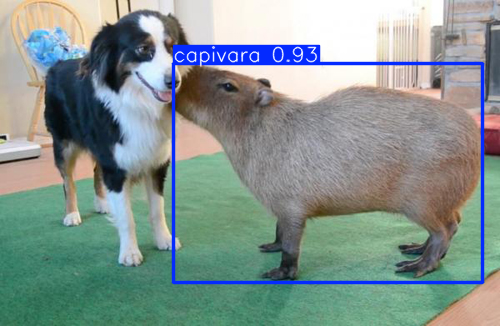

In [11]:
for result in results_best:
    result.show()

In [16]:
import pandas as pd

df = pd.read_csv("/content/runs/detect/train/results.csv")


In [17]:
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,76.1205,1.22681,1.19439,1.58036,0.88924,0.90514,0.91956,0.72177,0.80701,0.63900,1.20960,0.000661,0.000661,0.000661
1,2,142.5250,1.05735,0.78937,1.38479,0.88458,0.85771,0.88575,0.68557,0.86252,0.72334,1.26755,0.001275,0.001275,0.001275
2,3,200.4930,1.03170,0.78570,1.38871,0.85529,0.86166,0.90452,0.68695,0.90539,0.82079,1.31750,0.001836,0.001836,0.001836
3,4,258.6730,1.04224,0.77372,1.35858,0.90594,0.88538,0.92292,0.70054,0.82314,0.69900,1.24790,0.001762,0.001762,0.001762
4,5,315.4640,0.99062,0.73167,1.33490,0.88603,0.89328,0.92419,0.73135,0.78373,0.58573,1.21793,0.001683,0.001683,0.001683
5,6,376.3090,0.93883,0.68885,1.30044,0.91726,0.92020,0.94079,0.74502,0.78247,0.57530,1.20087,0.001604,0.001604,0.001604
6,7,436.5340,0.90545,0.64399,1.26988,0.90602,0.91456,0.94307,0.77015,0.73375,0.50142,1.16320,0.001525,0.001525,0.001525
7,8,506.2290,0.88178,0.63608,1.26157,0.93944,0.87352,0.93954,0.75923,0.71841,0.50846,1.14703,0.001446,0.001446,0.001446
8,9,569.9920,0.88215,0.60372,1.25071,0.91582,0.90304,0.95229,0.78292,0.70957,0.45182,1.15598,0.001366,0.001366,0.001366
9,10,639.8460,0.81453,0.56245,1.21006,0.91848,0.90119,0.94607,0.76312,0.71569,0.51458,1.14929,0.001287,0.001287,0.001287


<Axes: xlabel='epoch'>

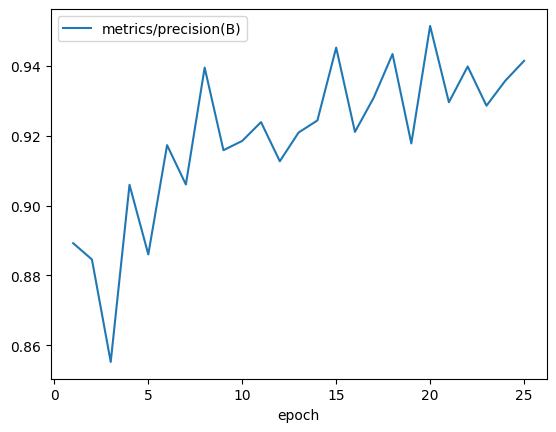

In [18]:
df.plot(x='epoch', y='metrics/precision(B)')